# Triggers Exercises

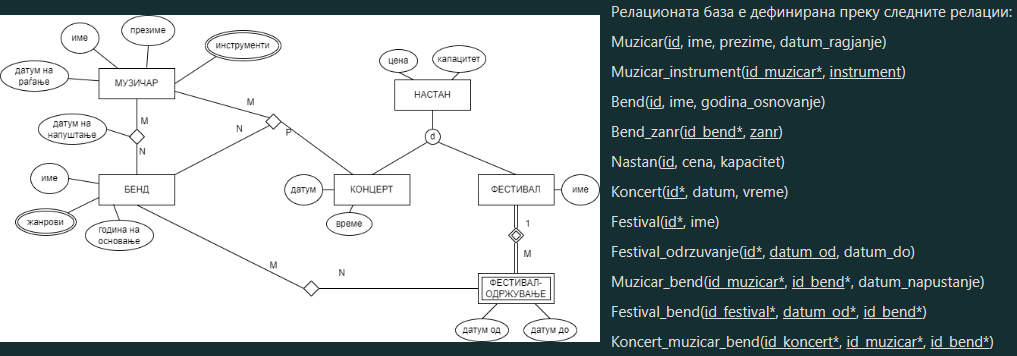

За секој музичар се чува изведен атрибут „br\_bendovi“ кој го означува бројот на бендови во кои свири тој музичар.  

**1. Да се напише/ат соодветниот/те тригер/и за одржување на конзистентноста на атрибутот „br\_bendovi“ при зачленување во бенд.**

In [ ]:
create trigger broj_bendovi
    after insert
    on Muzicar_bend
    for each row
begin
    update Muzicar
    set br_bendovi = (select count(*)
                      from Muzicar_bend
                      where id_muzicar = new.id_muzicar)
    where id = new.id_muzicar;
end;

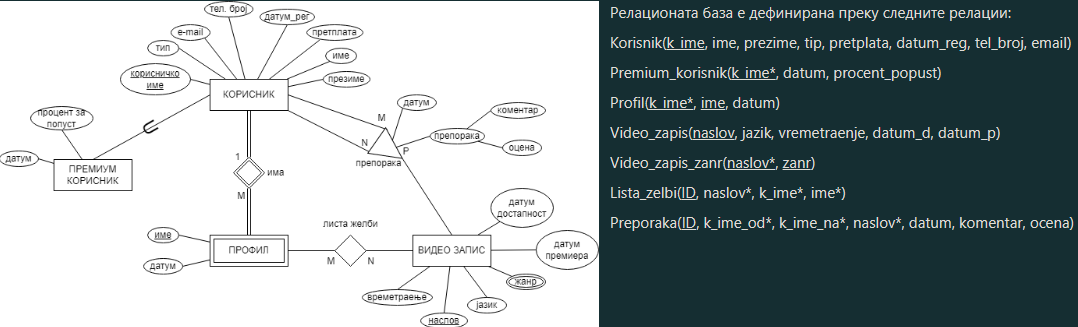

За секој видео запис се чува изведен атрибут „prosechna\_ocena“ кој ја означува просечната оцена добиена од препораки. Дополнително, пресметана е моменталната вредност на овој атрибут за секој видео запис.  

**2. Да се напише/ат соодветниот/те тригер/и за одржување на конзистентноста на атрибутот „prosechna\_ocena“ при додавање на записите од кои зависи неговата вредност.**

In [ ]:
create trigger prosek
    after insert
    on Preporaka
    for each row
begin
    update Video_zapis
    set prosechna_ocena = (
        select avg(ocena)
        from Preporaka
        where Preporaka.naslov = Video_zapis.naslov
        )
    where Video_zapis.naslov = new.naslov;
end;


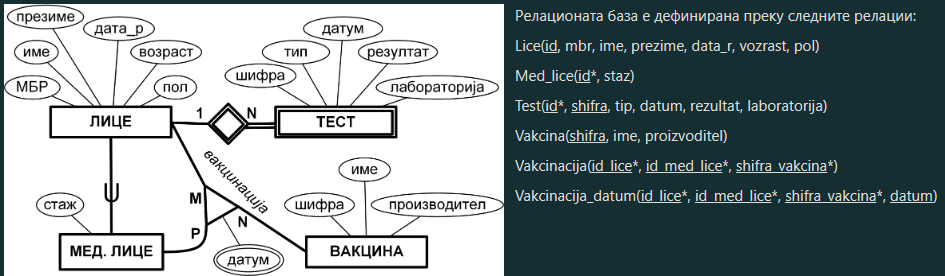

Во табелата Lice е креиран изведен атрибут „celosno\_imuniziran“ кој прима вредности 0 и 1 и кажува дали лицето е целосно имунизирано (вакцинирано со барем две дози вакцина). Дополнително, пресметана е моменталната вредност на овој атрибут за секое лице.  

**3. Да се напише/ат тригер/и за одржување на вредноста на атрибутот „celosno\_imuniziran“ при додавање на записите од кои зависи неговата вредност.**

In [ ]:
create trigger vakcina
    after insert
    on Vakcinacija_datum
    for each row
begin
    update Lice
    set celosno_imuniziran = (
        case
            when (select count(*)
                  from Vakcinacija_datum
                  where Vakcinacija_datum.id_lice = Lice.id) > 1 then 1
            else 0
        end
        )
    where id = new.id_lice;
end;

За секое лице дополнително се чува изведен атрибут „vakcinalen\_status“ кој го покажува моменталниот статус за вакцините на даденото лице. Атрибутот vakcinalen\_status може да ги прима следните вредности: 'nema vakcina', 'primena prva doza', 'primeni dve dozi'. На почеток сите лица имаат vakcinalen\_status='nema vakcina'. Статусот на дадено лице станува 'primena prva doza' кога лицето ќе прими прва доза од некоја вакцина. Статусот на дадено лице станува 'primeni dve dozi' кога лицето ќе ја прими втората доза од вакцината. 

**4\. Да се напише/ат тригер/и за одржување на вредноста на атрибутот „vakcinalen\_status“ при додавање на нови записи од кои зависи неговата вредност.**

In [ ]:
create trigger vakcina
    after insert
    on Vakcinacija_datum
    for each row
begin
    update Lice
    set vakcinalen_status = (
        case
            when (select count(*)
                  from Vakcinacija_datum
                  where Vakcinacija_datum.id_lice = Lice.id) = 1 then 'primena prva doza'
            when (select count(*)
                  from Vakcinacija_datum
                  where Vakcinacija_datum.id_lice = Lice.id) = 2 then 'primeni dve dozi'
            else 'nema vakcina'
        end
        )
    where id = new.id_lice;
end;

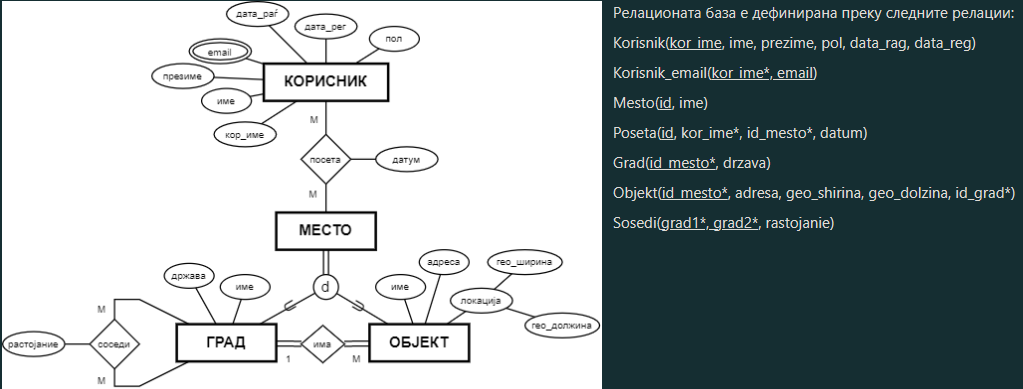

**5\. Да се напише/ат соодветниот/те тригер/и за одржување на референцијалниот интегритет на релациите „СОСЕДИ“ и „ПОСЕТА“ доколку треба да се исполнети следните барања:** 

**\- Сакаме да водиме евиденција за соседните градови на град кој е избришан од системот.** 

**\- Не сакаме да водиме евиденција за посетите на места на корисници кои се избришани од системот.**

In [ ]:
create trigger sosedni
    after delete
    on Grad
    for each row
begin
    update Sosedi
    set grad1 = null
    where grad1 = old.id_mesto;
    update Sosedi
    set grad2 = null
    where grad2 = old.id_mesto;
end;

create trigger korisnici
    after delete
    on Korisnik
    for each row
begin
    delete from Poseta
    where kor_ime = old.kor_ime;
end;

За секое место се чува изведен атрибут „broj\_poseti“ кој го означува бројот на различни корисници кои го посетиле. 

**6\. Да се напише/ат соодветниот/те тригер/и за одржување на конзистентноста на атрибутот „broj\_poseti“ при додавање на записите од кои зависи нивната вредност.**

In [ ]:
create trigger br_poseti
    after insert
    on Poseta
    for each row
begin
    update Mesto
    set broj_poseti = (
        select count(distinct kor_ime)
        from Poseta
        where Mesto.id = Poseta.id_mesto
        )
    where id = new.id_mesto;
end;

За секој корисник се чува изведен атрибут „broj\_poseti“ кој го означува бројот на различни места кои ги посетиле.

**7\. Да се напише/ат соодветниот/те тригер/и за одржување на конзистентноста на атрибутот „broj\_poseti“ при додавање на записите од кои зависи нивната вредност.**

In [ ]:
create trigger br_poseti
    after insert
    on Poseta
    for each row
begin
    update Korisnik
    set broj_poseti = (
        select count(distinct id_mesto)
        from Poseta
        where Korisnik.kor_ime = Poseta.kor_ime
        )
    where kor_ime = new.kor_ime;
end;